# Random walk Simulation 

3 가지 큰 토픽..?!

## Formal problem desciption 

먼저 Informal problem decription 를 포멀한 형태로 바꾼 뒤 생각하자! "rigorous"

### Inventing computational models 

계산 가능한 모델! 
<br>
이를 통해 Dealing with & exploiting <strong>randomness</strong><br>
세상의 불확실성..! (예측 불가능함.) <br>
그래서 우리가 모델을 만들 때 stochastic(incorporate randomness)를 생각해야 한다.

## Making sense of data 

당신이 월마트 관리자라 생각하면 어디에 신경이 가겠는가? "어떤 상황에서 고객들이 물품을 구매할지?"에 관심이 있을 것. <br>
당신은 아마 과거의 데이터로부터 인사이트를 얻어 예측할 수도 있을 것이다.(월마트의 경우 엄청난 양의 과거 구매 데이터가 있으니) <br> 숫자를 보거나 시각화 해서 이해를 도울 것

## Evaluating quality of answers 

프로그램이 어떠한 숫자나, 스트링을 리턴하게 만드는 것은 쉽다. <br> __중요한 것은 그 결과물이 정말 유의한지 납득시키는 것__이다. <br>
허나 프로그램이 옳은 답을 했는지 어떻게 알지? 당신은 답을 알지 못한다. 그냥 믿는 수 밖에 없단 말인가?? 아니면 믿지 말아야 하나? <br>


#### 프로그램의 답을 믿을지 말지 결정하는 법에 대해 배우겠다 

## Example 

아주 거하게 취한 대학생이 잔디밭을 걷고 있다. 매초마다 그는 움직이는데 그의 걸음 걸이는 어디로 향할지 모른다. (__Random__) <br>
제약사항은 500초~1000초... <br>
그는 과연 어디로 얼만큼 갈 것인가?

### Start simple 

진짜 세상에 대한 단순한 근사로 시작하는 것은 좋다.
__cartesian could__<br>
대학생은 동서남북 4방향으로 밖에 못 움직인다고 생각해보자.
<br><br>
이러한 __시뮬레이션__을 칠판에 그려볼 수도 있지만,, 우린 프로그래머니까 프로그램으로 해보자!! <br>
__Random Walk__!!! 
<hr>
이를 통해, 솔루션의 구조를 디자인하기 위한 인사이트를 얻자

### Data Abstraction 

* Location
* CompassPt(학생이 움직일 방향) # direction
* Field (Whole cartesian plane)
* Drunk (움직이는 주체)

In [1]:
import math, random, pylab

Pseudo random (우리가 느끼기에 랜덤일 수 있지만 컴퓨터는 판별적 기계이기 때문에 엄밀한 의미의 랜덤은 아니다) <br>
<br>
pylab은 Matlab의 특징을 파이썬으로 가지고 온 패키지(이번엔 그래프를 그리기 위해)


In [7]:
class Location(object):
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
    def move(self, xc, yc): #객체를 리턴?
        return Location(self.x+float(xc), self.y+float(yc))
    def getCoords(self):
        return self.x, self.y
    def getDist(self, other):
        ox, oy = other.getCoords()
        xDist = self.x - ox
        yDist = self.y - oy
        return math.sqrt(xDist**2 + yDist**2)

class CompassPt(object):
    """dirctions을 간편히 다루기 위한 클래스"""
    possibles = ('N', 'S', 'E', 'W') # global varaible
    # 어떤 인스턴스에서나 공통으로 가지게 되는 value
    def __init__(self, pt):
        # 만약 동서남북이 아닌 방향이 들어오면 에러
        if pt in self.possibles: self.pt = pt
        else: raise ValueError('in CompassPt.__init__')
    def move(self, dist):
        if self.pt == 'N': return (0, dist)
        elif self.pt == 'S': return (0, -dist)
        elif self.pt == 'E': return (dist, 0)
        elif self.pt == 'W': return (-dist, 0)
        else: raise ValueError('in CompassPt.move')

class Field(object):
    def __init__(self, drunk, loc):
        self.drunk = drunk
        self.loc = loc
    def move(self, cp, dist):
        oldLoc = self.loc
        xc, yc = cp.move(dist) # 동서남북으로 움직임을 줌.
        self.loc = oldLoc.move(xc, yc)
    def getLoc(self):
        return self.loc
    def getDrunk(self):
        return self.drunk

class Drunk(object):
    def __init__(self, name):
        self.name = name
    def move(self, field, time = 1):
        # time의 default value = 1
        if field.getDrunk() != self:
            raise ValueError('Drunk.move called with drunk not in field')
        for i in range(time):
            pt = CompassPt(random.choice(CompassPt.possibles))
            field.move(pt, 1)

우리가 Encapsulation을 하는 동안 무엇을 결정하는가?
1. 2-dimensions space (fixed) (x,y)
2. 동서남북의 방향

In [4]:
def performTrial(time, f):
    start = f.getLoc() # 첫 시작
    # distance를 구할 때 마다 시작점으로부터 얼마나 멀어지는지
    # 체크해서 플롯팅할 것임.
    distances = [0.0]
    for t in range(1, time+1):
        f.getDrunk().move(f)
        newLoc = f.getLoc()
        distance = newLoc.getDist(start)
        distances.append(distance)
    return distances

In [19]:
#assert False
def firstTest(trials=1):
    drunk = Drunk('Homer Simpson')
    for i in range(trials): # 시뮬레이션을 3번
        f = Field(drunk, Location(0,0))
        distances = performTrial(500, f)
        pylab.plot(distances)
    pylab.title('Homer\'s Random Walk')
    pylab.xlabel('Time')
    pylab.ylabel('Distance from Origin')
    pylab.show()

어쩌면 이걸 계속 돌려보는 것은 바보짓일지도..! <br>
이제 이 시뮬레이션의 성능을 평가해보자 

1. Inner loop that simulates 1 trial.
2. "Enclose" inner loop in a loop that conducts  appropriate # of of trials.
3. Calculate and present some relevent statistics.

In [8]:
def performSim(time, numTrials):
    distLists = []
    for trial in range(numTrials):
        d = Drunk('Drunk' + str(trial))
        f = Field(d, Location(0,0))
        distances = performTrial(time, f)
        distLists.append(distances)
    return distLists # 각 시뮬레이션에 대한 리스트들의 리스트

In [42]:
def ansQuest(maxTime, numTrials):
    means = []
    distLists = performSim(maxTime, numTrials)
    for t in range(maxTime+1):
        tot = 0.0
        for distL in distLists:
            tot += distL[t]
        means.append(tot/len(distLists))
    pylab.figure()
    pylab.plot(means)
    pylab.ylabel('distance')
    pylab.xlabel('time')
    pylab.title('Average Distance vs. Time : ' + str(len(distLists)) + 'trials')
    pylab.show()

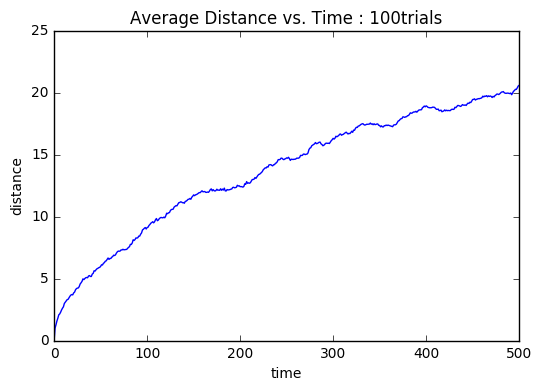

In [47]:
ansQuest(500,100)

결과물을 보니 스무스한 결과를 얻었다. 이는 뭔가 결과에 대한 신뢰감을 가지게 한다. (어떠한 트렌드를 보이는거보다..) <br>
이게 맞는지 틀린지 어떻게 알지..?  <br>
하지만 개별 시뮬레이션을 플롯팅 해봤을 때를 생각해봐라. 분명 40의 거리까지 벌어지기도 했었다. <br>
그렇담 둘 중 하나는 틀렸다는 것. 여기엔 버그가 있다.. ! 이럴 땐 1 step으로 테스트해보는것.. 
len(distL[t]) -> len(distLists) 

버그 고친 후 몇 번씩 시뮬레이션 해봐도 20 근처로 수렴한다.

### Label axes & look 

Ask if answer makes sense

## Applications 

* Brownian motion
* Stock market
* Kinetics
* Evolution

## Pylab 

Matlab의 여러 기능을 파이썬 인터페이스에서 실행할 수 있도록 한 패키지

In [48]:
from pylab import *

In [53]:
plot([1,2,3,4])
plot([5,6,7,8])

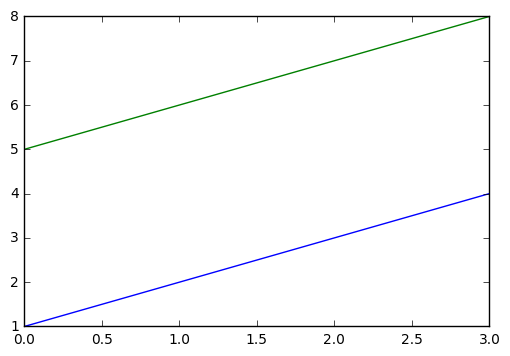

In [54]:
show()

x축은 디폴트로 0부터 시작..?!

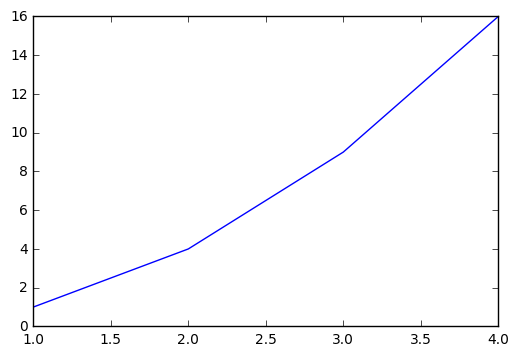

In [57]:
plot([1,2,3,4],[1,4,9,16])
show() # x & y

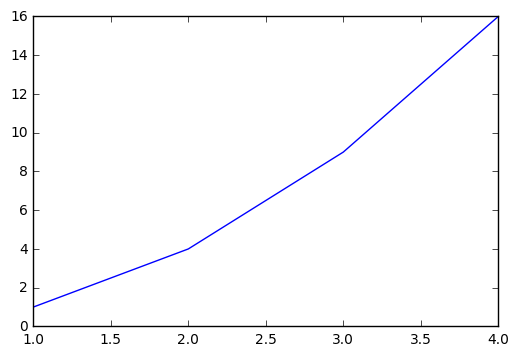

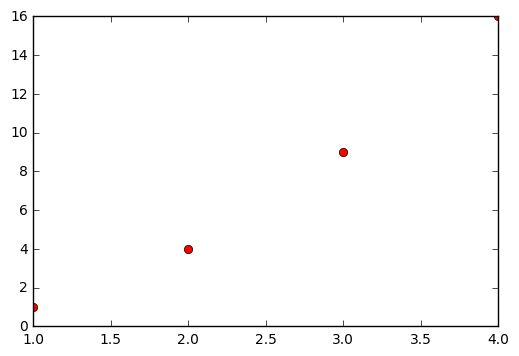

In [66]:
plot([1,2,3,4],[1,4,9,16])
figure() # create new figure
plot([1,2,3,4],[1,4,9,16], 'ro') # red O
show()

빨간점을 찍긴했는데 축 가까이 있는건 보기 안좋음..!

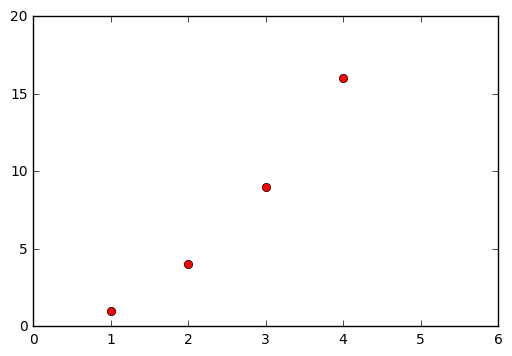

In [67]:
plot([1,2,3,4],[1,4,9,16], 'ro') # red O
axis([0,6,0,20]) # 축 범위 조정
show()

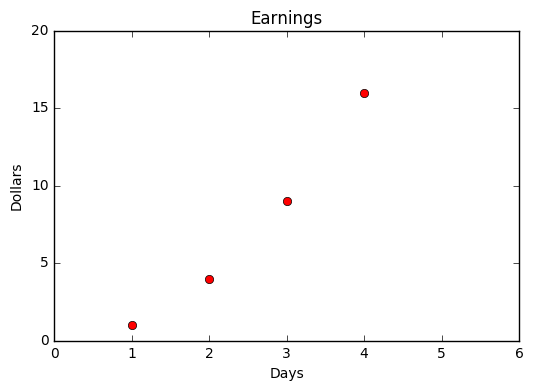

In [68]:
plot([1,2,3,4],[1,4,9,16], 'ro') # red O
axis([0,6,0,20]) # 축 범위 조정
title('Earnings')
xlabel('Days')
ylabel('Dollars')
show()

지금까지는 x와 y에 list를 넘겨줬었다. 

### array

프로그래밍 언어에서 array는 다양한 의미를 가지지만 numpy의 경우 matrix를 지칭한다.

[1 2 3 4]
[1 2 3 4]
[ True  True  True  True]


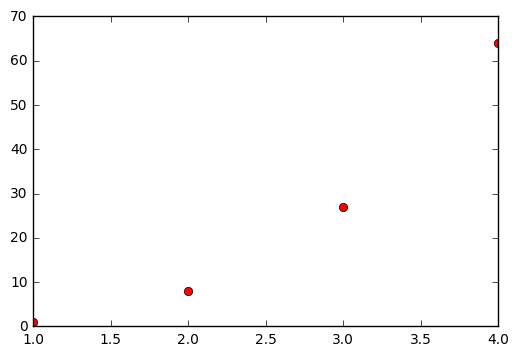

In [70]:
xAxis = array([1,2,3,4])
print xAxis
test = arange(1,5)
print test
print test == xAxis
yAxis = xAxis**3 
## list 대신 array를 이용하면 선형대수 관련 연산 가능
plot(xAxis,yAxis,'ro')
show()

범위는 list와 array가 같지만 array를 사용하면 선형대수 연산을 사용할 수 있다. 

In [71]:
x = [1,2,3,4]
x**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [72]:
x = array([1,2,3,4])
x**2

array([ 1,  4,  9, 16])

In [74]:
import random

# histogram을 통한 정규분포

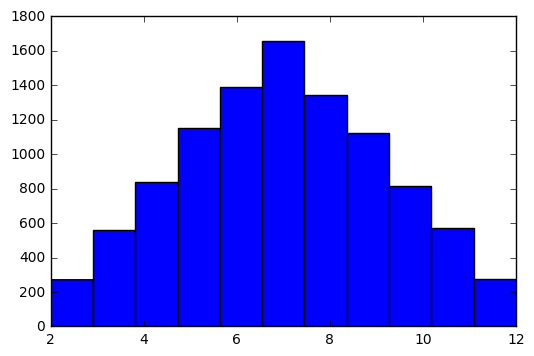

In [80]:
vals = []
dieVals = [1,2,3,4,5,6]
for i in range(10000):
    vals.append(random.choice(dieVals)+random.choice(dieVals))
hist(vals, bins=11)
show()